In [1]:
# Uses the variables Mptdensns and SpEsns to plot individual Es layer occurence events
# Mptdensns is the M+ dens at all grid locations, and SpEsns is the M+ dens only where Es layer identified, with NaNs elsewhere
# Plotting lat-lon plots at chosen altitude, then using this to pick a location (lat,lon) to plot an altitude vs local time plot. 
# Local time is calculated from UT using the time zone shift for the latitude chosen to offset the time

In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt 
from datetime import datetime, timedelta
import matplotlib.colors as colors
import matplotlib.dates as mdates
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize
from matplotlib.ticker import FuncFormatter


In [4]:
def scientific_formatter(x, pos):
    if x == 0:
        return "$0$"
    exponent = int(np.floor(np.log10(x)))
    base = round(x / 10**exponent)
    if base == 1:
        return f"$10^{{{exponent}}}$"
    else:
        return f"${base} \\times 10^{{{exponent}}}$"


In [5]:
#===================================================================================================
#===================================================================================================
#===================================================================================================

In [103]:
# Plotting an individual Es layer identified by my algorithm
### S U M M E R ###
WACCM_data_alt = '90-150km'

# filename_append = '1sigma_3xMpza_1xpeak'
# criteria_label = 'A'

# filename_append = '0.5sigma_1xMpza_2xpeak'
# criteria_label = 'G'

# filename_append = '0.5sigma_1xMpza_1xpeak'
# criteria_label = 'H'

filename_append = '0.25sigma_2xMpza_1xpeak'
criteria_label = 'I'

# filename_append = '0sigma_1xMpza_1xpeak'
# criteria_label = 'M'

# filename_append = '0sigma_0.5xMpza_0.5xpeak'
# criteria_label = 'N'

# months = 'Dec-Feb'

months = 'Jun-Aug'

# months = 'Mar-May'

# months = 'Sep-Nov'


file = f'/resstore/b0243/Data/Sporadic_E/Solar_Max/SpE_Algorithm_Output_yr2000/SMax_SpE_Output_{months}_{WACCM_data_alt}_{filename_append}.nc' # /resstore/b0243/Data/Sporadic_E/Solar_Min/SpE_Algorithm_Output_yr2000/SMin_SpE_Output

ds_sum = xr.open_dataset(file, decode_times = False)
ds_sum

<xarray.Dataset>
Dimensions:                    (lev: 126, lev_sl: 23, time: 336, lat: 96,
                                latsl: 36, lon: 144, LT: 48, LT_L: 144,
                                timesl: 2, mth: 3)
Coordinates:
  * lev                        (lev) float64 4.055e-10 5.207e-10 ... 970.6 992.6
  * lev_sl                     (lev_sl) float64 5.418e-06 6.956e-06 ... 0.001329
  * time                       (time) float64 0.0 1.0 2.0 ... 333.0 334.0 335.0
  * lat                        (lat) float64 -90.0 -88.11 -86.21 ... 88.11 90.0
  * latsl                      (latsl) float64 -87.5 -82.5 -77.5 ... 82.5 87.5
  * lon                        (lon) float64 0.0 2.5 5.0 ... 352.5 355.0 357.5
  * LT                         (LT) float64 0.0 0.5 1.0 1.5 ... 22.5 23.0 23.5
  * LT_L                       (LT_L) float64 0.0 0.1667 0.3333 ... 23.67 23.83
  * timesl                     (timesl) float64 0.0 1.0
  * mth                        (mth) float64 6.0 7.0 8.0
Data variables: (12/29)
    Zavg_sl                    (lev_sl) float64 ...
    altavg                     (lev) float64 ...
    altavg_sl                  (lev_sl) float64 ...
    times_str_min              (mth, timesl) object ...
    times_str_max              (mth, timesl) object ...
    SpEsns_Occ_Freq_lat        (lat) float64 ...
    ...                         ...
    Mptdens_nsavg              (lev_sl, lat, lon, timesl, mth) float64 ...
    Mptdens_avv1_b_5d          (lev_sl, latsl, timesl, mth) float64 ...
    Mptdens_std                (lev_sl, lat, LT_L, timesl, mth) float64 ...
    Mptdens_avg                (lev_sl, lat, LT_L, timesl, mth) float64 ...
    SpEs_freq_time             (lev_sl, lat, LT_L, timesl, mth) float64 ...
    SpEsns_freq_time           (lev_sl, lat, lon, timesl, mth) float64 ...

In [104]:
lev_sl = ds_sum.variables['lev_sl']
lat = ds_sum.variables['lat']
intlat = ds_sum.variables['latsl']
lon = ds_sum.variables['lon']
LT = ds_sum.variables['LT']
LT_L = ds_sum.variables['LT_L']

Zavg_sl = ds_sum.variables['Zavg_sl']
altavg_sl = ds_sum.variables['altavg_sl']

times_str_min = ds_sum.variables['times_str_min']
times_str_max = ds_sum.variables['times_str_max']

SpEs = ds_sum['SpEs'] #(25, 336, 96, 144, 2, 3)
Mptdens_sh = ds_sum['Mptdens_sh']

SpEsns = ds_sum['SpEsns']
Mptdensns = ds_sum['Mptdensns']

In [105]:

desired_altitude_km = 100.0
desired_alt_km = '100'

# Find the index of the closest altitude in geopH
closest_altitude_index = np.abs(altavg_sl - desired_altitude_km).argmin(dim='lev_sl')

SpEsns_sl = SpEsns.isel(lev_sl=closest_altitude_index)  #SpEsns=(lev_sl, time, lat, lon, timesl, mth)
Mptdensns_sl = Mptdensns.isel(lev_sl=closest_altitude_index)

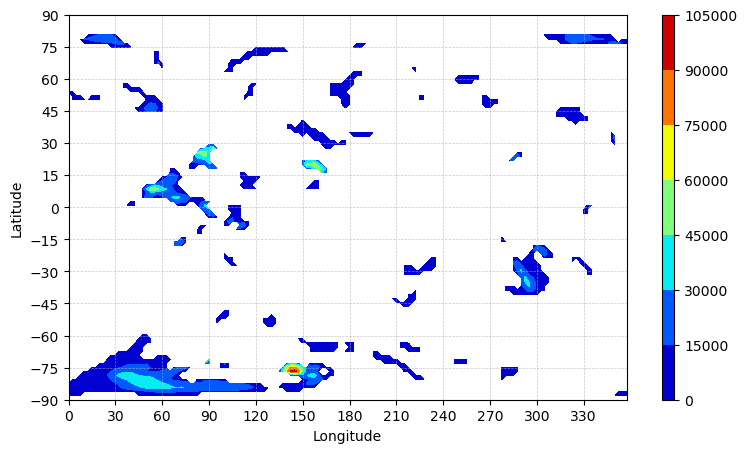

In [106]:

SpEsns_plot = SpEsns_sl[0, :, :, 0, 0] #time, lat, lon, timesl, mth   select first time of first 2wk period of first month 
plotdatetime = '06-01-00:00' #1st June

fig, ax = plt.subplots(figsize=(9,5))

contour = ax.contourf(lon, lat, SpEsns_plot, cmap='jet')
cbar = plt.colorbar(contour, ax=ax, orientation='vertical', pad=0.05, aspect=30)

ax.set_yticks(np.arange(-90, 91, 15))
ax.set_ylabel('Latitude')

# Add grid lines
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Set x ticks every 30 degrees
ax.set_xticks(np.arange(0,360, 30))
ax.set_xlabel('Longitude')


figname = f'Es_Layer_sel_lat_lon_{plotdatetime}_{desired_alt_km}km.png'
plt.savefig(f'./Figures/Wuhu_IonTr_run/Es_ID/{filename_append}/' + str(figname), dpi=400, bbox_inches='tight')


plt.show()

# Location 1: lat=12.5, lon=307.5

In [107]:
Esmin = 0  
Esmax = 24  

#Select data : 24h period, lev,lat,lon. (First month and 2wk period of that month)
Mptdensns_sl = Mptdensns[:,Esmin:Esmax,:,:,0,0]      #(19, 24, 96, 144)
SpEsns_sl = SpEsns[:,Esmin:Esmax,:,:,0,0]

targetlat1 = 12.5
targetlon1 = 307.5

#Select
Mptdensns_sel1 = Mptdensns_sl.sel(lat=targetlat1, lon=targetlon1, method='nearest')    #(19,24)
SpEsns_sel1 = SpEsns_sl.sel(lat=targetlat1, lon=targetlon1, method='nearest')

/tmp/ipykernel_82240/508737399.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), ha='center')


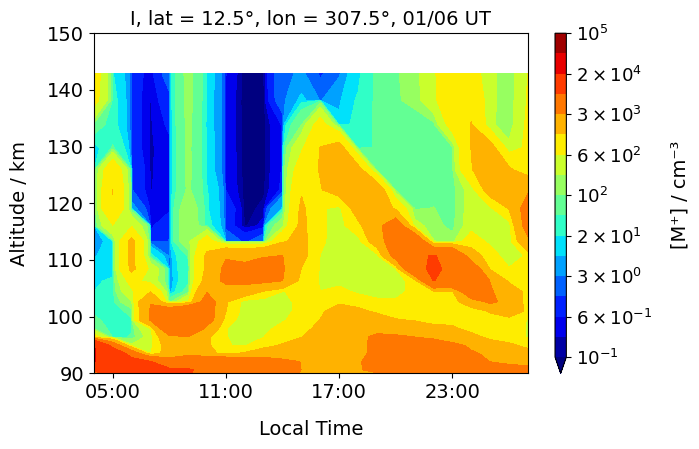

In [108]:
####   Mptdensns  ######
# Metal ion density in lat,lon


hr = 7   #starting UT index
timezoneshift = -3     
starthr = hr+timezoneshift   #starting local time

start_date = datetime(2023, 6, 1, starthr)


num_days = 1  
UT_Plot = [start_date + timedelta(hours=starthr) for starthr in range(0, 24 * num_days)]

fig, ax = plt.subplots(figsize=(7, 5))

vmin = 1e-1
vmax = 1e5

num_levels = 17

contour = ax.contourf(UT_Plot, Zavg_sl, Mptdensns_sel1, cmap='jet',
                      norm=LogNorm(vmin=vmin, vmax=vmax),
                      levels=np.logspace(np.log10(vmin), np.log10(vmax), num_levels),
                      extend='min'
                     )

cbar = plt.colorbar(contour, ax=ax, orientation='vertical', pad=0.05, aspect=30, format=FuncFormatter(scientific_formatter))

cbar.set_label('[M⁺] / cm⁻³', fontsize=14, labelpad=13)

cbar.ax.tick_params(labelsize=13)

ax.set_xlabel('Local Time', fontsize=14, labelpad=13)
ax.set_ylabel('Altitude / km', fontsize=14, labelpad=13)
ax.set_ylim([90, 150])

ax.set_title(f'{criteria_label}, lat = {targetlat1}\u00b0, lon = {targetlon1}\u00b0, 01/06 UT', fontsize=14)

fig.autofmt_xdate()

for label in ax.get_xticklabels():
    label.set_fontsize(12)
    label.set_rotation(0) 

ax.set_xticklabels(ax.get_xticks(), ha='center')

ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))  
date_format = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(date_format)

contour.set_clim(vmin, vmax)

ax.tick_params(axis='both', which='major', labelsize=14)


start_date_str = str(start_date).replace(' ', '_')

figname = f'Es_Layer_lat_{targetlat1}_lon_{targetlon1}_{start_date_str}LT.png'
plt.savefig(f'./Figures/Wuhu_IonTr_run/Es_ID/{filename_append}/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()

/tmp/ipykernel_82240/1618883503.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), ha='center')


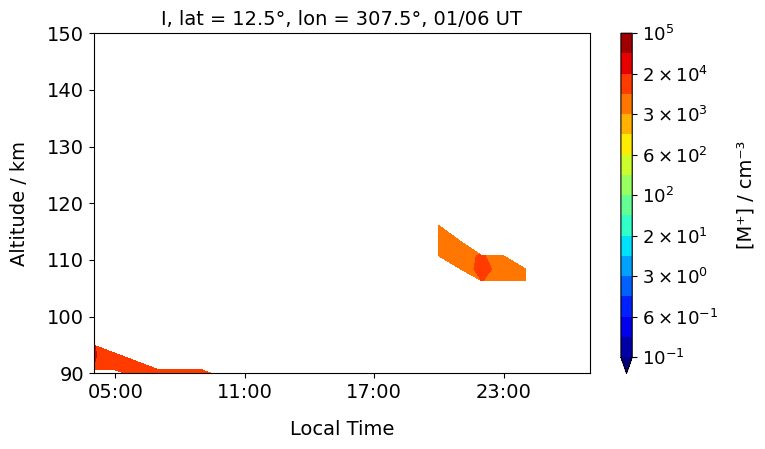

In [109]:
####   SpEsns  ######


hr = 7
timezoneshift = -3
starthr = hr+timezoneshift


start_date = datetime(2023, 6, 1, starthr)


num_days = 1 
UT_Plot = [start_date + timedelta(hours=starthr) for starthr in range(0, 24 * num_days)]

fig, ax = plt.subplots(figsize=(8, 5))

vmin = 1e-1
vmax = 1e5

num_levels = 17

contour = ax.contourf(UT_Plot, Zavg_sl, SpEsns_sel1, cmap='jet',
                      norm=LogNorm(vmin=vmin, vmax=vmax),
                      levels=np.logspace(np.log10(vmin), np.log10(vmax), num_levels),
                      extend='min'
                     )

cbar = plt.colorbar(contour, ax=ax, orientation='vertical', pad=0.05, aspect=30, format=FuncFormatter(scientific_formatter))

cbar.set_label('[M⁺] / cm⁻³', fontsize=14, labelpad=13)

cbar.ax.tick_params(labelsize=13)

ax.set_xlabel('Local Time', fontsize=14, labelpad=13)
ax.set_ylabel('Altitude / km', fontsize=14, labelpad=13)
ax.set_ylim([90, 150])

ax.set_title(f'{criteria_label}, lat = {targetlat1}\u00b0, lon = {targetlon1}\u00b0, 01/06 UT', fontsize=14)


fig.autofmt_xdate()

for label in ax.get_xticklabels():
    label.set_fontsize(12)
    label.set_rotation(0) 

ax.set_xticklabels(ax.get_xticks(), ha='center')

ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))  
date_format = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(date_format)

contour.set_clim(vmin, vmax)

ax.tick_params(axis='both', which='major', labelsize=14)


start_date_str = str(start_date).replace(' ', '_')

figname = f'Es_Layer_sel_lat_{targetlat1}_lon_{targetlon1}_{start_date_str}LT.png'
plt.savefig(f'./Figures/Wuhu_IonTr_run/Es_ID/{filename_append}/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()

In [ ]:

hr = 7
timezoneshift = -3
starthr = hr + timezoneshift

start_date = datetime(2023, 6, 1, starthr)
num_days = 1 
UT_Plot = [start_date + timedelta(hours=starthr) for starthr in range(0, 24 * num_days)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

vmin = 1e-1
vmax = 1e5
num_levels = 17

contour1 = axes[0].contourf(UT_Plot, Zavg_sl, Mptdensns_sel1, cmap='jet',
                           norm=LogNorm(vmin=vmin, vmax=vmax),
                           levels=np.logspace(np.log10(vmin), np.log10(vmax), num_levels),
                           extend='min'
                           )

cbar1 = plt.colorbar(contour1, ax=axes[0], orientation='vertical', pad=0.05, aspect=30, format=FuncFormatter(scientific_formatter))
cbar1.ax.tick_params(labelsize=13)

axes[0].set_xlabel('Local Time', fontsize=14, labelpad=13)
axes[0].set_ylabel('Altitude / km', fontsize=14, labelpad=13)
axes[0].set_ylim([90, 150])
axes[0].set_title(f'{criteria_label}, lat = {targetlat1}\u00b0, lon = {targetlon1}\u00b0, 01/06 UT', fontsize=14)
axes[0].tick_params(axis='both', which='major', labelsize=14)

fig.autofmt_xdate()
axes[0].set_xticklabels(axes[0].get_xticks(), ha='center')
axes[0].xaxis.set_major_locator(mdates.HourLocator(interval=6))
date_format = mdates.DateFormatter('%H:%M')
axes[0].xaxis.set_major_formatter(date_format)
contour1.set_clim(vmin, vmax)

contour2 = axes[1].contourf(UT_Plot, Zavg_sl, SpEsns_sel1, cmap='jet',
                            norm=LogNorm(vmin=vmin, vmax=vmax),
                            levels=np.logspace(np.log10(vmin), np.log10(vmax), num_levels),
                            extend='min'
                            )

cbar2 = plt.colorbar(contour2, ax=axes[1], orientation='vertical', pad=0.05, aspect=30, format=FuncFormatter(scientific_formatter))
cbar2.set_label('[M⁺] / cm⁻³', fontsize=14, labelpad=13)
cbar2.ax.tick_params(labelsize=13)

axes[1].set_xlabel('Local Time', fontsize=14, labelpad=13)
axes[1].set_ylabel('Altitude / km', fontsize=14, labelpad=13)
axes[1].set_ylim([90, 150])
axes[1].set_title(f'{criteria_label}, lat = {targetlat1}\u00b0, lon = {targetlon1}\u00b0, 01/06 UT', fontsize=14)
axes[1].tick_params(axis='both', which='major', labelsize=14)

fig.autofmt_xdate()
axes[1].set_xticklabels(axes[1].get_xticks(), ha='center')
axes[1].xaxis.set_major_locator(mdates.HourLocator(interval=6))
axes[1].xaxis.set_major_formatter(date_format)
contour2.set_clim(vmin, vmax)

plt.tight_layout()

start_date_str = str(start_date).replace(' ', '_')
figname = f'Es_Layer_IDcomp_lat_{targetlat1}_lon_{targetlon1}_{start_date_str}LT.png'
plt.savefig(f'./Figures/Wuhu_IonTr_run/Es_ID/{filename_append}/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()


# Location 2: lat=48.5 lat, lon=45

In [ ]:
Esmin = 0  
Esmax = 24  

#Select data : 24h period, lev,lat,lon. (First month and 2wk period of that month)
Mptdensns_sl = Mptdensns[:,Esmin:Esmax,:,:,0,0]      #(19, 24, 96, 144)
SpEsns_sl = SpEsns[:,Esmin:Esmax,:,:,0,0]

targetlat2 = 48.5
targetlon2 = 45

Mptdensns_sel2 = Mptdensns_sl.sel(lat=targetlat2, lon=targetlon2, method='nearest')    #(19,24)
SpEsns_sel2 = SpEsns_sl.sel(lat=targetlat2, lon=targetlon2, method='nearest')

In [ ]:
####   Mptdensns  ######
# Metal ion density in lat,lon


hr = 0   #starting UT index
timezoneshift = +3     
starthr = hr+timezoneshift   #starting local time


start_date = datetime(2023, 6, 1, starthr)


num_days = 1  
UT_Plot = [start_date + timedelta(hours=starthr) for starthr in range(0, 24 * num_days)]

fig, ax = plt.subplots(figsize=(7, 5))

vmin = 1e-1
vmax = 6e4

num_levels = 17

contour = ax.contourf(UT_Plot, Zavg_sl, Mptdensns_sel2, cmap='jet',
                      norm=LogNorm(vmin=vmin, vmax=vmax),
                      levels=np.logspace(np.log10(vmin), np.log10(vmax), num_levels),
                      extend='min'
                     )

cbar = plt.colorbar(contour, ax=ax, orientation='vertical', pad=0.05, aspect=30, format=FuncFormatter(scientific_formatter))

cbar.set_label('[M⁺] / cm⁻³', fontsize=14, labelpad=13)

cbar.ax.tick_params(labelsize=13)

ax.set_xlabel('Local Time', fontsize=14, labelpad=13)
ax.set_ylabel('Altitude / km', fontsize=14, labelpad=13)
ax.set_ylim([90, 128])

ax.set_title(f'{criteria_label}, lat = {targetlat2}\u00b0, lon = {targetlon2}\u00b0, 01/06 UT', fontsize=14)


fig.autofmt_xdate()

for label in ax.get_xticklabels():
    label.set_fontsize(12)
    label.set_rotation(0)  

ax.set_xticklabels(ax.get_xticks(), ha='center')

ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))  
date_format = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(date_format)

contour.set_clim(vmin, vmax)

ax.tick_params(axis='both', which='major', labelsize=14)


start_date_str = str(start_date).replace(' ', '_')

figname = f'Es_Layer_lat_{targetlat2}_lon_{targetlon2}_{start_date_str}LT.png'
plt.savefig(f'./Figures/Wuhu_IonTr_run/Es_ID/{filename_append}/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()

In [ ]:
####   SpEsns  ######


hr = 0
timezoneshift = +3
starthr = hr+timezoneshift


start_date = datetime(2023, 6, 1, starthr)


num_days = 1  
UT_Plot = [start_date + timedelta(hours=starthr) for starthr in range(0, 24 * num_days)]

fig, ax = plt.subplots(figsize=(8, 5))

vmin = 1e-1
vmax = 6e4

num_levels = 17

contour = ax.contourf(UT_Plot, Zavg_sl, SpEsns_sel2, cmap='jet',
                      norm=LogNorm(vmin=vmin, vmax=vmax),
                      levels=np.logspace(np.log10(vmin), np.log10(vmax), num_levels),
                      extend='min'
                     )

cbar = plt.colorbar(contour, ax=ax, orientation='vertical', pad=0.05, aspect=30, format=FuncFormatter(scientific_formatter))

cbar.set_label('[M⁺] / cm⁻³', fontsize=14, labelpad=13)

cbar.ax.tick_params(labelsize=13)

# Set labels and title as needed
ax.set_xlabel('Local Time', fontsize=14, labelpad=13)
ax.set_ylabel('Altitude / km', fontsize=14, labelpad=13)
ax.set_ylim([90, 128])

ax.set_title(f'{criteria_label}, lat = {targetlat2}\u00b0, lon = {targetlon2}\u00b0, 01/06 UT', fontsize=14)


fig.autofmt_xdate()

for label in ax.get_xticklabels():
    label.set_fontsize(12)
    label.set_rotation(0)  

ax.set_xticklabels(ax.get_xticks(), ha='center')
ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))  
date_format = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(date_format)

contour.set_clim(vmin, vmax)

ax.tick_params(axis='both', which='major', labelsize=14)


start_date_str = str(start_date).replace(' ', '_')

figname = f'Es_Layer_sel_lat_{targetlat2}_lon_{targetlon2}_{start_date_str}LT.png'
plt.savefig(f'./Figures/Wuhu_IonTr_run/Es_ID/{filename_append}/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()

In [ ]:

hr = 7
timezoneshift = -3
starthr = hr + timezoneshift

start_date = datetime(2023, 6, 1, starthr)
num_days = 1 
UT_Plot = [start_date + timedelta(hours=starthr) for starthr in range(0, 24 * num_days)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

vmin = 1e-1
vmax = 1e5
num_levels = 17

contour1 = axes[0].contourf(UT_Plot, Zavg_sl, Mptdensns_sel2, cmap='jet',
                           norm=LogNorm(vmin=vmin, vmax=vmax),
                           levels=np.logspace(np.log10(vmin), np.log10(vmax), num_levels),
                           extend='min'
                           )

cbar1 = plt.colorbar(contour1, ax=axes[0], orientation='vertical', pad=0.05, aspect=30, format=FuncFormatter(scientific_formatter))

cbar1.ax.tick_params(labelsize=13)

axes[0].set_xlabel('Local Time', fontsize=14, labelpad=13)
axes[0].set_ylabel('Altitude / km', fontsize=14, labelpad=13)
axes[0].set_ylim([90, 150])
axes[0].set_title(f'{criteria_label}, lat = {targetlat2}\u00b0, lon = {targetlon2}\u00b0, 01/06 UT', fontsize=14)
axes[0].tick_params(axis='both', which='major', labelsize=14)

fig.autofmt_xdate()
axes[0].set_xticklabels(axes[0].get_xticks(), ha='center')
axes[0].xaxis.set_major_locator(mdates.HourLocator(interval=6))
date_format = mdates.DateFormatter('%H:%M')
axes[0].xaxis.set_major_formatter(date_format)
contour1.set_clim(vmin, vmax)

contour2 = axes[1].contourf(UT_Plot, Zavg_sl, SpEsns_sel2, cmap='jet',
                            norm=LogNorm(vmin=vmin, vmax=vmax),
                            levels=np.logspace(np.log10(vmin), np.log10(vmax), num_levels),
                            extend='min'
                            )

cbar2 = plt.colorbar(contour2, ax=axes[1], orientation='vertical', pad=0.05, aspect=30, format=FuncFormatter(scientific_formatter))
cbar2.set_label('[M⁺] / cm⁻³', fontsize=14, labelpad=13)
cbar2.ax.tick_params(labelsize=13)

axes[1].set_xlabel('Local Time', fontsize=14, labelpad=13)
axes[1].set_ylabel('Altitude / km', fontsize=14, labelpad=13)
axes[1].set_ylim([90, 150])
axes[1].set_title(f'{criteria_label}, lat = {targetlat2}\u00b0, lon = {targetlon2}\u00b0, 01/06 UT', fontsize=14)
axes[1].tick_params(axis='both', which='major', labelsize=14)

fig.autofmt_xdate()
axes[1].set_xticklabels(axes[1].get_xticks(), ha='center')
axes[1].xaxis.set_major_locator(mdates.HourLocator(interval=6))
axes[1].xaxis.set_major_formatter(date_format)
contour2.set_clim(vmin, vmax)

plt.tight_layout()

start_date_str = str(start_date).replace(' ', '_')
figname = f'Es_Layer_IDcomp_lat_{targetlat2}_lon_{targetlon2}_{start_date_str}LT.png'
plt.savefig(f'./Figures/Wuhu_IonTr_run/Es_ID/{filename_append}/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()


# Location 3: lat=-75, lon=120

In [ ]:
Esmin = 0  
Esmax = 24  

#Select data : 24h period, lev,lat,lon. (First month and 2wk period of that month)
Mptdensns_sl = Mptdensns[:,Esmin:Esmax,:,:,0,0]      #(19, 24, 96, 144)
SpEsns_sl = SpEsns[:,Esmin:Esmax,:,:,0,0]

targetlat3 = -77.5
targetlon3 = 150

#Select
Mptdensns_sel3 = Mptdensns_sl.sel(lat=targetlat3, lon=targetlon3, method='nearest')    #(19,24)
SpEsns_sel3 = SpEsns_sl.sel(lat=targetlat3, lon=targetlon3, method='nearest')

In [ ]:
####   Mptdensns  ######
# Metal ion density in lat,lon


hr = 0   #starting UT index
timezoneshift = +8     
starthr = hr+timezoneshift   #starting local time


start_date = datetime(2023, 6, 1, starthr)


num_days = 1  
UT_Plot = [start_date + timedelta(hours=starthr) for starthr in range(0, 24 * num_days)]

fig, ax = plt.subplots(figsize=(7, 5))

vmin = 1e-1
vmax = 3e5


num_levels = 17

contour = ax.contourf(UT_Plot, Zavg_sl, Mptdensns_sel3, cmap='jet',
                      norm=LogNorm(vmin=vmin, vmax=vmax),
                      levels=np.logspace(np.log10(vmin), np.log10(vmax), num_levels),
                      extend='min'
                     )

cbar = plt.colorbar(contour, ax=ax, orientation='vertical', pad=0.05, aspect=30, format=FuncFormatter(scientific_formatter))

cbar.set_label('[M⁺] / cm⁻³', fontsize=14, labelpad=13)

cbar.ax.tick_params(labelsize=13)

ax.set_xlabel('Local Time', fontsize=14, labelpad=13)
ax.set_ylabel('Altitude / km', fontsize=14, labelpad=13)
ax.set_ylim([90, 128])

ax.set_title(f'{criteria_label}, lat = {targetlat3}\u00b0, lon = {targetlon3}\u00b0, 01/06 UT', fontsize=14)

fig.autofmt_xdate()

for label in ax.get_xticklabels():
    label.set_fontsize(12)
    label.set_rotation(0)  

ax.set_xticklabels(ax.get_xticks(), ha='center')

ax.xaxis.set_major_locator(mdates.HourLocator(interval=6)) 
date_format = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(date_format)

contour.set_clim(vmin, vmax)

ax.tick_params(axis='both', which='major', labelsize=14)


start_date_str = str(start_date).replace(' ', '_')

figname = f'Es_Layer_lat_{targetlat3}_lon_{targetlon3}_{start_date_str}LT.png'
plt.savefig(f'./Figures/Wuhu_IonTr_run/Es_ID/{filename_append}/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()

In [ ]:
####   SpEsns  ######


hr = 0
timezoneshift = +8
starthr = hr+timezoneshift


start_date = datetime(2023, 6, 1, starthr)


num_days = 1 
UT_Plot = [start_date + timedelta(hours=starthr) for starthr in range(0, 24 * num_days)]

fig, ax = plt.subplots(figsize=(8, 5))

vmin = 1e-1
vmax = 3e5

num_levels = 17

contour = ax.contourf(UT_Plot, Zavg_sl, SpEsns_sel3, cmap='jet',
                      norm=LogNorm(vmin=vmin, vmax=vmax),
                      levels=np.logspace(np.log10(vmin), np.log10(vmax), num_levels),
                      extend='min'
                     )

cbar = plt.colorbar(contour, ax=ax, orientation='vertical', pad=0.05, aspect=30, format=FuncFormatter(scientific_formatter))

cbar.set_label('[M⁺] / cm⁻³', fontsize=14, labelpad=13)

cbar.ax.tick_params(labelsize=13)

ax.set_xlabel('Local Time', fontsize=14, labelpad=13)
ax.set_ylabel('Altitude / km', fontsize=14, labelpad=13)
ax.set_ylim([90, 128])

ax.set_title(f'{criteria_label}, lat = {targetlat3}\u00b0, lon = {targetlon3}\u00b0, 01/06 UT', fontsize=14)


fig.autofmt_xdate()

for label in ax.get_xticklabels():
    label.set_fontsize(12)
    label.set_rotation(0) 

ax.set_xticklabels(ax.get_xticks(), ha='center')
ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))  
date_format = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(date_format)

contour.set_clim(vmin, vmax)

ax.tick_params(axis='both', which='major', labelsize=14)


start_date_str = str(start_date).replace(' ', '_')

figname = f'Es_Layer_sel_lat_{targetlat3}_lon_{targetlon3}_{start_date_str}LT.png'
plt.savefig(f'./Figures/Wuhu_IonTr_run/Es_ID/{filename_append}/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()

In [ ]:

hr = 7
timezoneshift = -3
starthr = hr + timezoneshift

start_date = datetime(2023, 6, 1, starthr)
num_days = 1
UT_Plot = [start_date + timedelta(hours=starthr) for starthr in range(0, 24 * num_days)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

vmin = 1e-1
vmax = 3e5
num_levels = 17

contour1 = axes[0].contourf(UT_Plot, Zavg_sl, Mptdensns_sel3, cmap='jet',
                           norm=LogNorm(vmin=vmin, vmax=vmax),
                           levels=np.logspace(np.log10(vmin), np.log10(vmax), num_levels),
                           extend='min'
                           )

cbar1 = plt.colorbar(contour1, ax=axes[0], orientation='vertical', pad=0.05, aspect=30, format=FuncFormatter(scientific_formatter))

cbar1.ax.tick_params(labelsize=13)

axes[0].set_xlabel('Local Time', fontsize=14, labelpad=13)
axes[0].set_ylabel('Altitude / km', fontsize=14, labelpad=13)
axes[0].set_ylim([90, 150])
axes[0].set_title(f'{criteria_label}, lat = {targetlat3}\u00b0, lon = {targetlon3}\u00b0, 01/06 UT', fontsize=14)
axes[0].tick_params(axis='both', which='major', labelsize=14)

fig.autofmt_xdate()
axes[0].set_xticklabels(axes[0].get_xticks(), ha='center')
axes[0].xaxis.set_major_locator(mdates.HourLocator(interval=6))
date_format = mdates.DateFormatter('%H:%M')
axes[0].xaxis.set_major_formatter(date_format)
contour1.set_clim(vmin, vmax)

contour2 = axes[1].contourf(UT_Plot, Zavg_sl, SpEsns_sel3, cmap='jet',
                            norm=LogNorm(vmin=vmin, vmax=vmax),
                            levels=np.logspace(np.log10(vmin), np.log10(vmax), num_levels),
                            extend='min'
                            )

cbar2 = plt.colorbar(contour2, ax=axes[1], orientation='vertical', pad=0.05, aspect=30, format='%.0e')
cbar2.set_label('[M⁺] / cm⁻³', fontsize=14, labelpad=13)
cbar2.ax.tick_params(labelsize=13)

axes[1].set_xlabel('Local Time', fontsize=14, labelpad=13)
axes[1].set_ylabel('Altitude / km', fontsize=14, labelpad=13)
axes[1].set_ylim([90, 150])
axes[1].set_title(f'{criteria_label}, lat = {targetlat3}\u00b0, lon = {targetlon3}\u00b0, 01/06 UT', fontsize=14)
axes[1].tick_params(axis='both', which='major', labelsize=14)

fig.autofmt_xdate()
axes[1].set_xticklabels(axes[1].get_xticks(), ha='center')
axes[1].xaxis.set_major_locator(mdates.HourLocator(interval=6))
axes[1].xaxis.set_major_formatter(date_format)
contour2.set_clim(vmin, vmax)

plt.tight_layout()

start_date_str = str(start_date).replace(' ', '_')
figname = f'Es_Layer_IDcomp_lat_{targetlat3}_lon_{targetlon3}_{start_date_str}LT.png'
plt.savefig(f'./Figures/Wuhu_IonTr_run/Es_ID/{filename_append}/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()
